## **Cell 1: Import Libraries**

**Purpose: Import necessary Python libraries for dataset handling, file operations, data analysis, and visualization.**

**Code:**

In [1]:
import kagglehub
import os
import shutil
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

## **Cell 2: Define Target Folder and Create Directory**
**Purpose:** Set up a target directory (data) to store the dataset and ensure it exists.

**Code:**

In [ ]:
# Define the target folder where you want to store the dataset
target_folder = os.path.join("data")

# Ensure the target folder exists
os.makedirs(target_folder, exist_ok=True)

# Download the latest version of the dataset
path = kagglehub.dataset_download("ciplab/real-and-fake-face-detection")

print("Path to dataset files:", path)

# Check if the downloaded path is a zip file
if path.endswith(".zip"):
    # Extract the zip file to the target folder
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(target_folder)
    print(f"Dataset extracted to: {target_folder}")
else:
    # If not a zip, copy the folder/files to the target folder
    shutil.copytree(path, target_folder, dirs_exist_ok=True)
    print(f"Dataset copied to: {target_folder}")

Path to dataset files: /kaggle/input/real-and-fake-face-detection
Dataset copied to: data


In [2]:
DATASET_DIR = os.path.join("..", "data", "real_and_fake_face")
TARGET_DIR = os.path.join("..", "data", "real_and_fake_face_dataset")

## **Cell 3: Define Dataset Paths and Identify Classes**

**Purpose:** Set paths for the dataset and identify class names (subfolders) in the dataset.

**Code:**

In [3]:
CLASSES = []
for item in os.listdir(DATASET_DIR):
    item_path = os.path.join(DATASET_DIR, item)
    if os.path.isdir(item_path):
        print(item)
        CLASSES.append(item)

training_fake
training_real


In [4]:
CLASSES

['training_fake', 'training_real']

## **Cell 4: Define Function to Create Image Dataset**

**Purpose:** Define a function to copy images from the source dataset to a new target directory, preserving class structure.

**Code:**

In [5]:
def create_image_dataset(source_dir, target_dir, classes):

  if os.path.exists(TARGET_DIR):
    shutil.rmtree(TARGET_DIR)
  os.makedirs(target_dir, exist_ok=True)

  for clas in classes:
    src_folder = os.path.join(source_dir, clas)
    dst_folder = os.path.join(target_dir, clas)

    os.makedirs(dst_folder, exist_ok=True)

    for img in os.listdir(src_folder):
      src_path = os.path.join(src_folder, img)
      dst_path = os.path.join(dst_folder, img)
      shutil.copy(src_path, dst_path)

## **Cell 5: Execute Dataset Creation**

**Purpose:** Call the create_image_dataset function to organize the dataset.

**Code:**

In [6]:
create_image_dataset(DATASET_DIR, TARGET_DIR, CLASSES)

## **Cell 6: Compute Class Distribution**

**Purpose:** Calculate the number of images per class and store in a DataFrame.

**Code:**

In [16]:
class_count = {cls: len(os.listdir(os.path.join(TARGET_DIR, cls))) for cls in CLASSES}
df_counts = pd.DataFrame.from_dict(class_count, orient='index', columns=['Count'])
df_counts['Percent'] = df_counts/df_counts['Count'].sum()

In [17]:
print("Class Distribution:")
df_counts

Class Distribution:


,Count,Percent
training_fake,960,0.470358
training_real,1081,0.529642


## **Cell 7: Visualize Class Distribution**

**Purpose:** Create a bar plot to visualize the number of images per class.

**Code:**

/tmp/ipykernel_12728/2797024147.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class", loc="upper right", frameon=False, labelcolor="white")


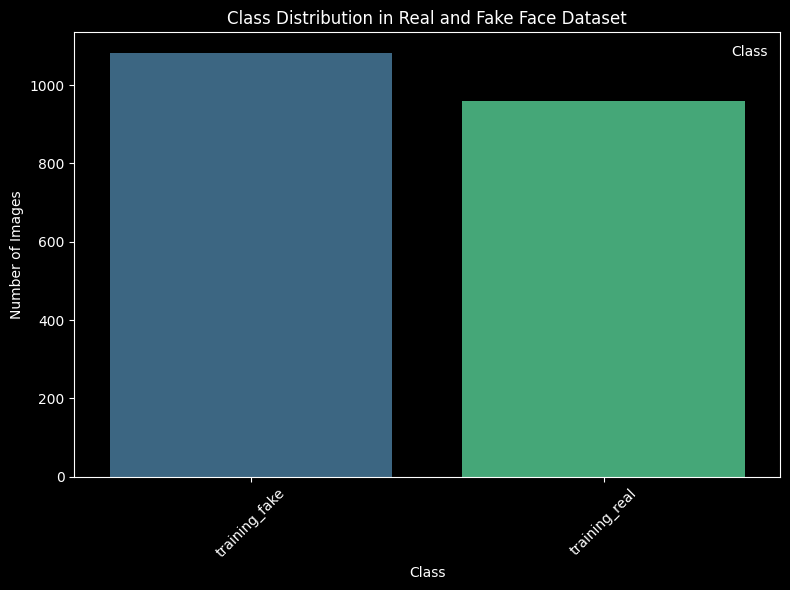

In [18]:
plt.style.use("dark_background")

# Create the figure
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(
    x=df_counts.index,
    y=df_counts["Count"].sort_values(ascending=False),
    hue=df_counts.index,
    palette="viridis",  # Optional: a color palette that looks good in dark theme
)

# Customize plot
plt.title("Class Distribution in Real and Fake Face Dataset", color="white")
plt.xlabel("Class", color="white")
plt.ylabel("Number of Images", color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")

# Adjust legend (optional, since hue is used)
plt.legend(title="Class", loc="upper right", frameon=False, labelcolor="white")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## **Cell 8: Visualize Sample Images**

**Purpose:** Display one sample image from each class to inspect the dataset visually.

**Code:**

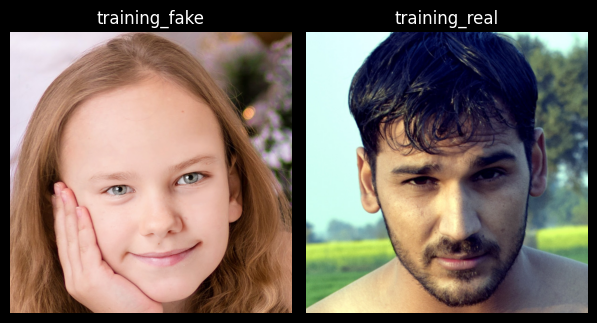

In [19]:
plt.figure(figsize=(12, 8))
for i, cls in enumerate(CLASSES):
    # Get the first image in the class directory
    img_path = os.path.join(TARGET_DIR, cls, os.listdir(os.path.join(TARGET_DIR, cls))[0])
    img = Image.open(img_path)
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(cls)
    plt.axis("off")
plt.tight_layout()
plt.show()